In [1072]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1073]:
pre_acc, post_acc, pruning_amount = [], [], []

In [1074]:
with open("VGG Models Average.csv", 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        pruning, pre, post = line.strip().split(',')
        pruning_amount.append(float(pruning))
        pre_acc.append(float(pre))
        post_acc.append(float(post))

In [1075]:
def fit_polynomial(x, y, z=4):
    coeffs = np.polyfit(x, y, z)

    poly_func = np.poly1d(coeffs)

    return coeffs, poly_func

Polynomial Coefficients: [-2.15903422e-10  4.88844460e-09  4.26306026e-06 -4.52477971e-04
  1.77757129e-02 -2.41407831e-01 -1.64220296e+00  5.18348447e+01]


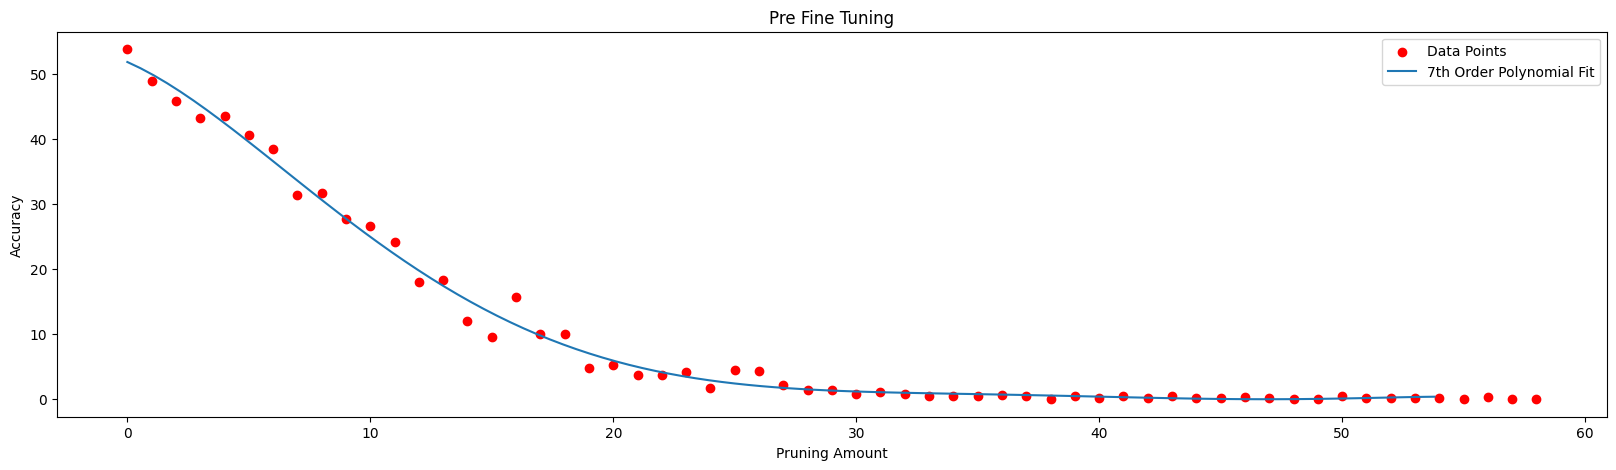

In [1076]:
z = 7

coeffs, poly_func = fit_polynomial(pruning_amount, pre_acc, z)
print("Polynomial Coefficients:", coeffs)

# Plot results
x_range = np.linspace(min(pre_acc), max(pre_acc), 100)
y_pred = poly_func(x_range)
plt.figure(figsize=(20, 5))
plt.scatter(pruning_amount, pre_acc, color='red', label='Data Points')
plt.plot(x_range, y_pred, label=f'{z}th Order Polynomial Fit')
plt.legend()
plt.title("Pre Fine Tuning")
plt.xlabel("Pruning Amount")
plt.ylabel("Accuracy")
plt.show()


Polynomial Coefficients: [ 3.19822451e-09 -6.98199507e-07  6.08073615e-05 -2.67562922e-03
  6.23183974e-02 -7.47406413e-01  3.26400873e+00  5.36459454e+01]


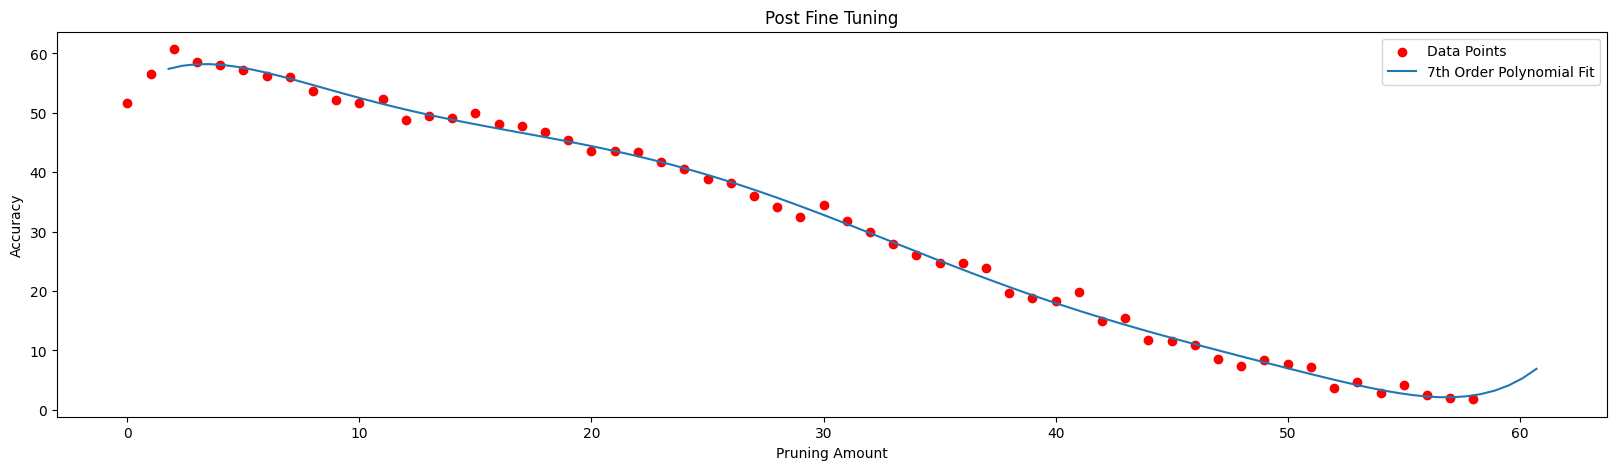

In [1077]:
coeffs, poly_func = fit_polynomial(pruning_amount, post_acc, z)
print("Polynomial Coefficients:", coeffs)

# Plot results
x_range = np.linspace(min(post_acc), max(post_acc), 100)
y_pred = poly_func(x_range)
plt.figure(figsize=(20, 5))
plt.scatter(pruning_amount, post_acc, color='red', label='Data Points')
plt.plot(x_range, y_pred, label=f'{z}th Order Polynomial Fit')
plt.legend()
plt.title("Post Fine Tuning")
plt.xlabel("Pruning Amount")
plt.ylabel("Accuracy")
plt.show()

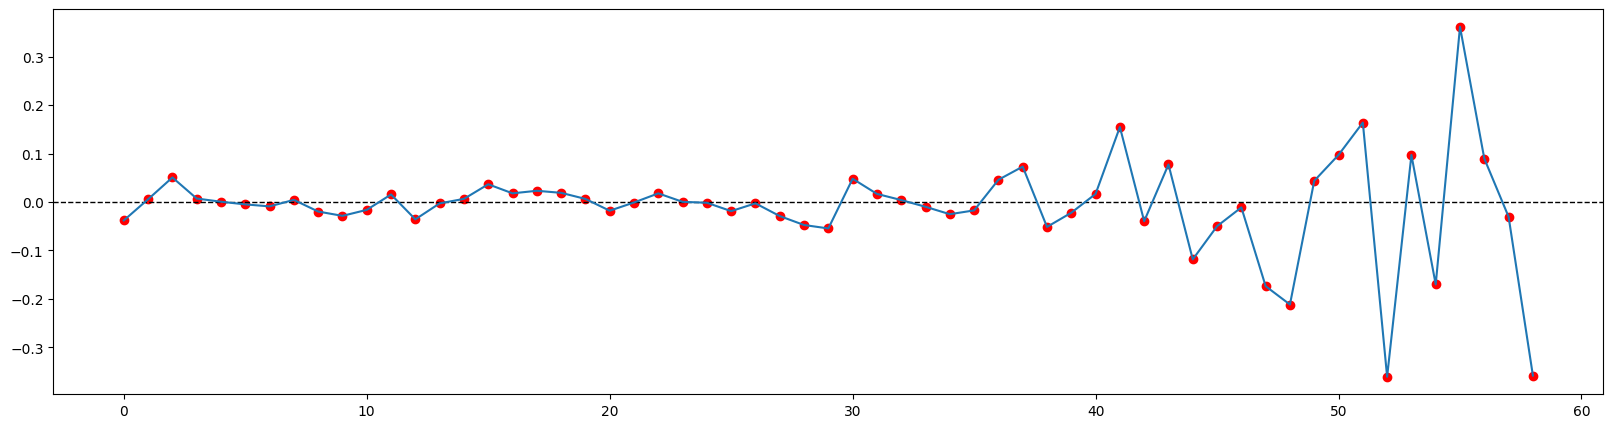

In [1078]:
errors = []
for i in range(len(pruning_amount)):
    original_post_acc = post_acc[i]
    expected_post_acc = poly_func(pruning_amount[i])
    error = (original_post_acc - expected_post_acc)/original_post_acc
    errors.append(error)

plt.figure(figsize=(20, 5))

plt.scatter(pruning_amount, errors, color='red', label='Data Points')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.plot(pruning_amount, errors, label='Error')
plt.show()


In [1079]:
pruning_amount_vgg11, pre_acc_vgg11, post_acc_vgg11 = [], [], []
with open('VGG11_results.csv', 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        pruning, pre, _, post, _, _ = line.strip().split(',')
        pruning_amount_vgg11.append(float(pruning))
        pre_acc_vgg11.append(float(pre))
        post_acc_vgg11.append(float(post))

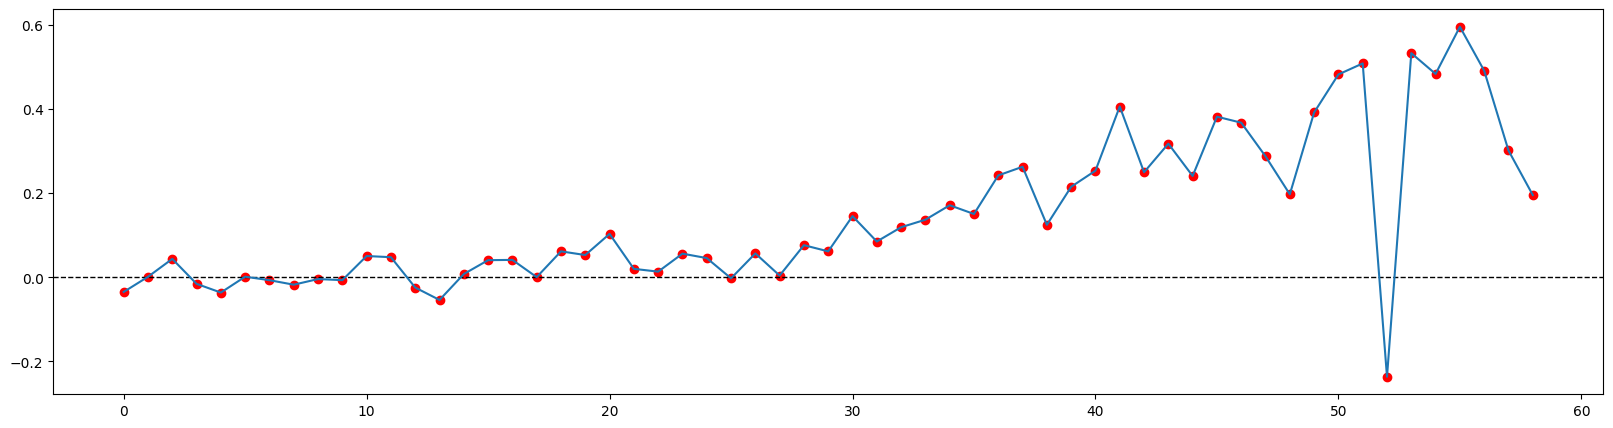

In [1080]:
errors = []
for i in range(len(pruning_amount)):
    original_post_acc = post_acc_vgg11[i]
    expected_post_acc = poly_func(pruning_amount[i])
    error = (original_post_acc - expected_post_acc)/original_post_acc
    errors.append(error)
plt.figure(figsize=(20, 5))
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.scatter(pruning_amount, errors, color='red', label='Data Points')
plt.plot(pruning_amount, errors, label='Error')
plt.show()


In [1081]:
def load_data_post(csv_files):
    pruning_amount = []
    post_acc = []
    
    for file in csv_files:
        df = pd.read_csv(file)
        pruning_amount.extend(df['pruning_amount'].values)
        post_acc.extend(df['post_acc'].values)
    
    return np.array(pruning_amount), np.array(post_acc)

Polynomial Coefficients: [ 7.52546014e-12 -2.14534645e-09  2.58624359e-07 -1.71366761e-05
  6.78805223e-04 -1.63513933e-02  2.32451065e-01 -1.79860076e+00
  5.65945211e+00  4.94511968e+01]
Final Equation:
            9             8             7             6             5
7.525e-12 x - 2.145e-09 x + 2.586e-07 x - 1.714e-05 x + 0.0006788 x
            4          3         2
 - 0.01635 x + 0.2325 x - 1.799 x + 5.659 x + 49.45
Total Error:  -140.0306571156477


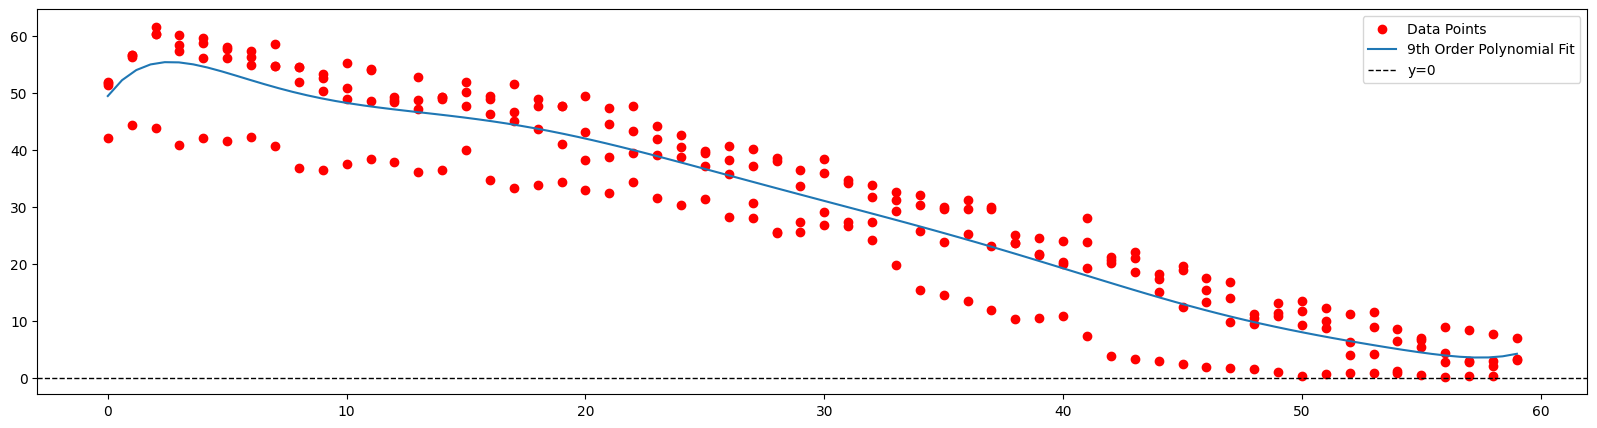

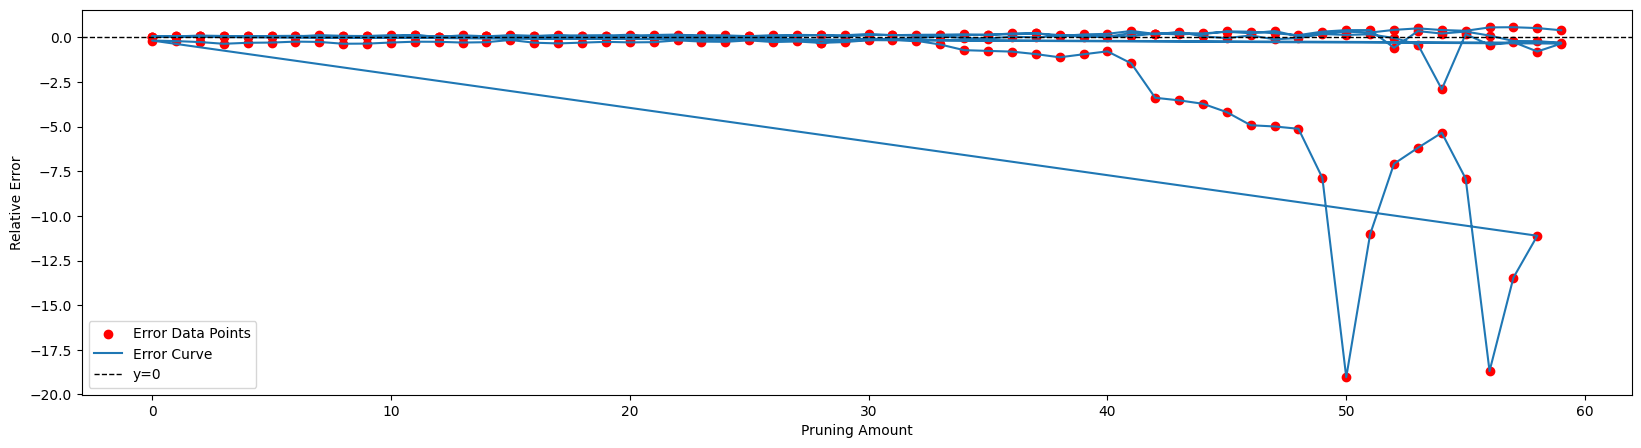

In [1082]:
csv_files = ["VGG11_results.csv", "VGG13_results.csv", "VGG16_results.csv", "AlexNet_results.csv"]
x, y = load_data_post(csv_files)
z = int(input("Enter the polynomial order: "))

coeffs, poly_func = fit_polynomial(x, y, z)
print("Polynomial Coefficients:", coeffs)
print("Final Equation:\n", poly_func)

# Calculate errors
errors = []
for i in range(len(x)):
    original_post_acc = y[i]
    expected_post_acc = poly_func(x[i])
    try:
        error = (original_post_acc - expected_post_acc) / original_post_acc
    except Exception as e:
        error = 0
        print(f"Error: {e}")
    errors.append(error)
print("Total Error: ", np.sum(errors))
plt.figure(figsize=(20, 5))
x_range = np.linspace(min(x), max(x), 100)
y_pred = poly_func(x_range)
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_range, y_pred, label=f'{z}th Order Polynomial Fit')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.legend()
plt.show()

# Plot errors
plt.figure(figsize=(20, 5))
plt.scatter(x, errors, color='red', label='Error Data Points')
plt.plot(x, errors, label='Error Curve')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.xlabel('Pruning Amount')
plt.ylabel('Relative Error')
plt.legend()
plt.show()



In [ ]:
# for AlexNet, pruning amount = 10:



In [1083]:
def load_data_pre(csv_files):
    pruning_amount = []
    pre_acc = []
    
    for file in csv_files:
        print(f"Using {file}")
        df = pd.read_csv(file)
        pruning_amount.extend(df['pruning_amount'].values)
        pre_acc.extend(df['pre_acc'].values)
        print(f"Done {file}")
    
    return np.array(pruning_amount), np.array(pre_acc)

Using VGG11_results.csv
Done VGG11_results.csv
Using VGG13_results.csv
Done VGG13_results.csv
Using VGG16_results.csv
Done VGG16_results.csv
Polynomial Coefficients: [-7.16170794e-12  2.00004727e-09 -2.34128619e-07  1.48546837e-05
 -5.49999206e-04  1.18473068e-02 -1.38257845e-01  7.77749995e-01
 -4.33363632e+00  5.31510336e+01]
Final Equation:
             9         8             7             6           5
-7.162e-12 x + 2e-09 x - 2.341e-07 x + 1.485e-05 x - 0.00055 x
            4          3          2
 + 0.01185 x - 0.1383 x + 0.7777 x - 4.334 x + 53.15
Total Error:  -3.347574547403061e+16


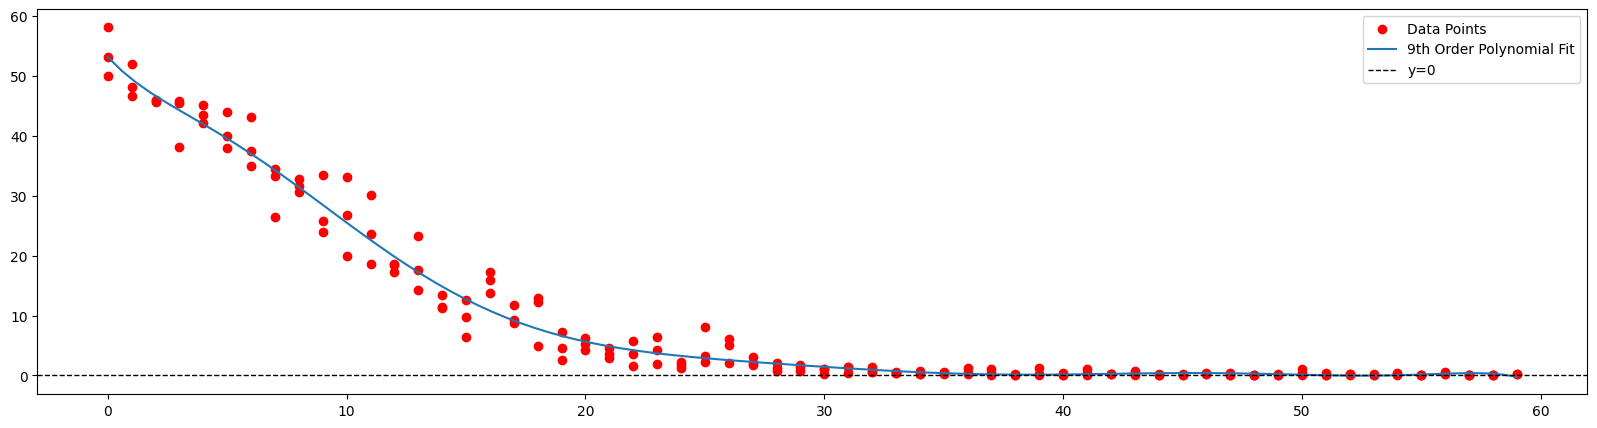

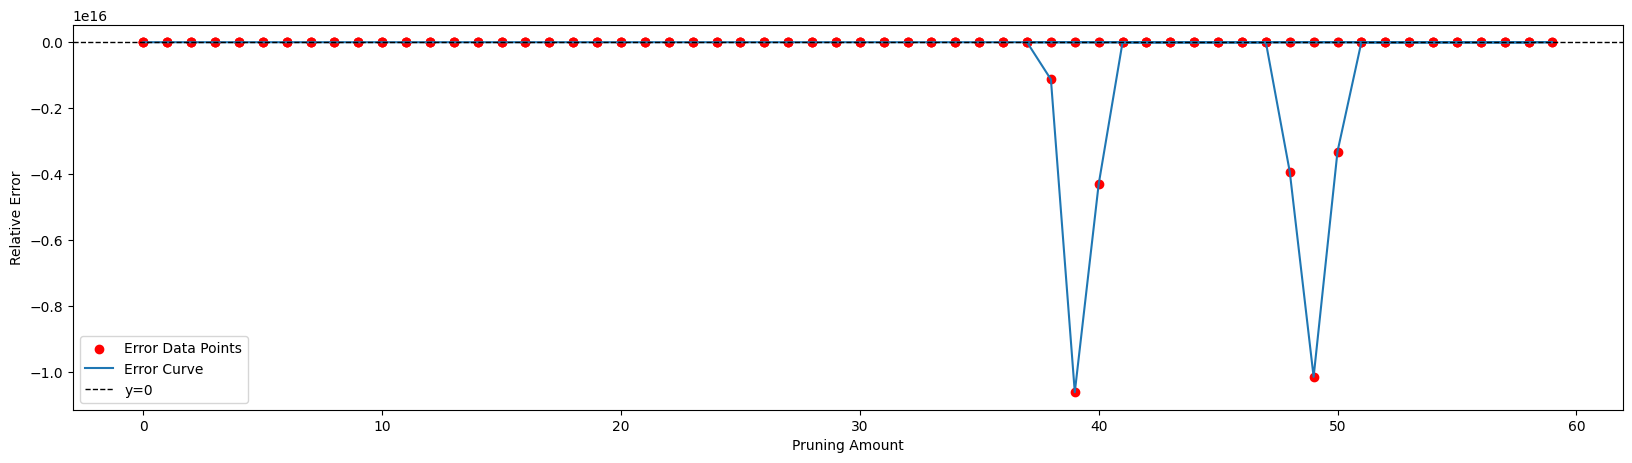

In [1084]:
csv_files = ["VGG11_results.csv", "VGG13_results.csv", "VGG16_results.csv"]
x, y = load_data_pre(csv_files)

coeffs, poly_func = fit_polynomial(x, y, z)
print("Polynomial Coefficients:", coeffs)
print("Final Equation:\n", poly_func)

# Calculate errors
errors = []
for i in range(len(x)):
    original_pre_acc = y[i]
    expected_pre_acc = poly_func(x[i])
    if original_pre_acc != 0:
        error = (original_pre_acc - expected_pre_acc) / original_pre_acc
    else:
        error = 0
    errors.append(error)
print("Total Error: ", np.sum(errors))

plt.figure(figsize=(20, 5))
x_range = np.linspace(min(x), max(x), 100)
y_pred = poly_func(x_range)
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_range, y_pred, label=f'{z}th Order Polynomial Fit')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.legend()
plt.show()

# Plot errors
plt.figure(figsize=(20, 5))
plt.scatter(x, errors, color='red', label='Error Data Points')
plt.plot(x, errors, label='Error Curve')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y=0')
plt.xlabel('Pruning Amount')
plt.ylabel('Relative Error')
plt.legend()
plt.show()

